
image 1/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102118.jpg: 480x640 (no detections), 27.3ms
image 2/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102343.jpg: 640x480 (no detections), 25.2ms
image 3/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102345.jpg: 640x480 (no detections), 23.0ms
image 4/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102459.jpg: 480x640 (no detections), 28.0ms
image 5/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102501.jpg: 480x640 (no detections), 24.0ms
image 6/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images\IMG_20240927_102755.jpg: 480x640 (no detections), 24.0ms
image 7/159 C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Grou

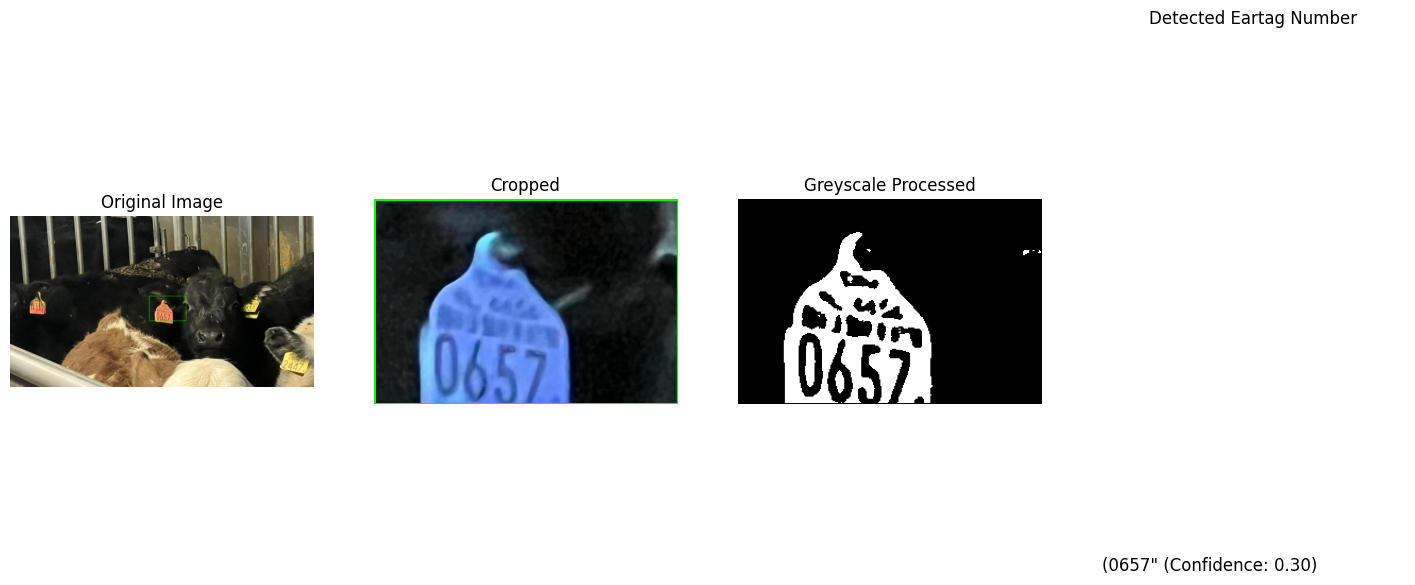

In [9]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
import easyocr

#Load yolo model from path
def load_model(model_path):
    
    return YOLO(model_path)

#Run inference on the image with the slected model.
def run_inference(model, image_path):
    
    return model.predict(source=image_path, save=False)
    
#Draw a bounding box on the image.
def draw_bounding_box(image, box):
   
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return (x1, y1, x2, y2)

#Crop the image to the bounding box area.
def crop_image(image, box):
    
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    return image[y1:y2, x1:x2]

#Convert the cropped image to grayscale and apply thresholding.
def process_image_for_ocr(cropped_image):

    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    thresh_binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
    return gray, thresh_binary

#Display the results  (original, cropped and processed images and the expected eartag number).
def display_results(original_image, cropped_image, thresh_binary, detected_text):
    plt.figure(figsize=(18, 7))

    # Original image
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Cropped image
    plt.subplot(1, 4, 2)
    plt.title("Cropped")
    plt.imshow(cropped_image)
    plt.axis('off')

    # Processed image
    plt.subplot(1, 4, 3)
    plt.title("Greyscale Processed")
    plt.imshow(thresh_binary, cmap="gray")
    plt.axis('off')

    # Eartag Number
    plt.subplot(1, 4, 4)
    plt.title("Detected Eartag Number")
    plt.axis('off')
    plt.text(0, 0, "\n".join([f"{text} (Confidence: {prob:.2f})" for text, prob in detected_text]), fontsize=12)

    plt.show()

model_path = r"C:/Users/Huijb/OneDrive/Bureaublad/Fontys/Semester 4/Group project/YOLOv8/runs/detect/train3/weights/last.pt"
test_image_path = r"C:\Users\Huijb\OneDrive\Bureaublad\Fontys\Semester 4\Group project\YOLOv8\data\images"
output_dir = "detections_with_labels"

model = load_model(model_path)
reader = easyocr.Reader(['en'])
results = run_inference(model, test_image_path)

for i, result in enumerate(results):
    if len(result.boxes) == 0:
        continue

    original_image = result.orig_img

    for j, box in enumerate(result.boxes):
        #Draw bounding box and crop image
        draw_bounding_box(original_image, box)  
        cropped_eartag = crop_image(original_image, box)  

        # Try to get eartug number from image
        ocr_results = reader.readtext(cropped_eartag)
        detected_text = [(text, prob) for (_, text, prob) in ocr_results]
        for text, prob in detected_text:
            print(f"Detected text: {text} (Confidence: {prob})")

        # Processes image (grayscale and try to enhance quaility)
        gray, thresh_binary = process_image_for_ocr(cropped_eartag)

        # Display results
        display_results(original_image, cropped_eartag, thresh_binary, detected_text)

